### Background

Buying a house in DC can be a daunting task. Inventory was described in November 2017 as ["dismally low"](https://www.washingtonpost.com/news/where-we-live/wp/2017/11/14/buyers-are-gaining-more-leverage-in-the-hot-d-c-area-housing-market/?utm_term=.b1aa57960214). But maybe armed with some appraisal data and machine learning, we can understand condominium values a little better. 

In [1]:
import os
import urllib
import openpyxl

import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = 35
%matplotlib inline

### Data Wrangling

Now we are ready to get our data. Storing the original files is always good practice so you can go back to the original data if needed. Below you will find a short python function to download data to a data directory. This way, if you decide to download more data later, you can set the information particular to that data as variables and re-use this function.

In [3]:
# create a default data directory. Since we are using os, this convention will work on both Windows and
# *nix based environments
DATA_DIR = "./data"

# the two variables below are the url of our dataset on the opendata site and the path/name for the file
#we are downloading
cama_url = "https://opendata.arcgis.com/datasets/d6c70978daa8461992658b69dccb3dbf_24.csv"
cama_file = os.path.join(DATA_DIR, "cama-condo.csv")

In [4]:
# the get_data function takes 3 variables - our data directory (dname), the url of our data (furl) and 
# the path/name for our file (fname)

def get_data(dname, furl, fname):
    
    # check to see if the data directory exists. if not, create it and print the message
    if not os.path.exists(dname):
        print("making directory")
        os.makedirs(dname)
    # if the data directory exists, just print the message
    else:
        print("directory exists")
        
    # check to see if the file exists. if not, download the file and print the message
    if not os.path.isfile(fname):
        print("downloading file")
        urllib.request.urlretrieve(furl, fname)
    
    # if the file exists, print the message (if you cloned the github repo, all the data is included)
    else:
        print("file exists")

In [5]:
get_data(DATA_DIR, cama_url, cama_file)

directory exists
file exists


In [6]:
df = pd.read_csv(cama_file)

We can use "head" to see the head, or first 5 rows of the data. If you want to see more than 5, put the number of rows you would like to see more rows, put the number you want inside the parenthesis.

In [7]:
df.head()

,OBJECTID,SSL,BLDG_NUM,CMPLX_NUM,AYB,YR_RMDL,EYB,ROOMS,BEDRM,BATHRM,HF_BATHRM,HEAT,HEAT_D,AC,FIREPLACES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,LIVING_GBA,USECODE,LANDAREA,GIS_LAST_MOD_DTTM
0,3001,5763 2009,1,1481,1965,NaN,2002,4.0,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2007-06-11T00:00:00.000Z,145000.0,Q,1,715,16,1185,2018-02-25T18:02:24.000Z
1,3002,5763 2010,1,1481,1965,NaN,2002,2.0,0.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2015-09-28T00:00:00.000Z,0.0,U,3,404,16,593,2018-02-25T18:02:24.000Z
2,3003,5763 2011,1,1481,1965,NaN,2002,4.0,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2005-08-16T00:00:00.000Z,126000.0,Q,1,688,16,988,2018-02-25T18:02:24.000Z
3,3004,5763 2012,1,1481,1965,NaN,2002,4.0,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2002-05-21T00:00:00.000Z,80995.0,Q,1,698,16,1087,2018-02-25T18:02:24.000Z
4,3005,5763 2013,1,1481,1965,NaN,2002,3.0,1.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2005-04-26T00:00:00.000Z,107500.0,Q,1,612,16,889,2018-02-25T18:02:24.000Z


In [8]:
df.head(8)

,OBJECTID,SSL,BLDG_NUM,CMPLX_NUM,AYB,YR_RMDL,EYB,ROOMS,BEDRM,BATHRM,HF_BATHRM,HEAT,HEAT_D,AC,FIREPLACES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,LIVING_GBA,USECODE,LANDAREA,GIS_LAST_MOD_DTTM
0,3001,5763 2009,1,1481,1965,NaN,2002,4.0,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2007-06-11T00:00:00.000Z,145000.0,Q,1,715,16,1185,2018-02-25T18:02:24.000Z
1,3002,5763 2010,1,1481,1965,NaN,2002,2.0,0.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2015-09-28T00:00:00.000Z,0.0,U,3,404,16,593,2018-02-25T18:02:24.000Z
2,3003,5763 2011,1,1481,1965,NaN,2002,4.0,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2005-08-16T00:00:00.000Z,126000.0,Q,1,688,16,988,2018-02-25T18:02:24.000Z
3,3004,5763 2012,1,1481,1965,NaN,2002,4.0,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2002-05-21T00:00:00.000Z,80995.0,Q,1,698,16,1087,2018-02-25T18:02:24.000Z
4,3005,5763 2013,1,1481,1965,NaN,2002,3.0,1.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2005-04-26T00:00:00.000Z,107500.0,Q,1,612,16,889,2018-02-25T18:02:24.000Z
5,3006,5763 2014,1,1481,1965,NaN,2002,3.0,1.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2017-03-27T00:00:00.000Z,54900.0,U,5,578,16,790,2018-02-25T18:02:24.000Z
6,3007,5763 2015,1,1481,1965,NaN,2002,3.0,1.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2002-08-20T00:00:00.000Z,65995.0,Q,1,578,16,790,2018-02-25T18:02:24.000Z
7,3008,5763 2016,1,1481,1965,NaN,2002,3.0,1.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2002-05-15T00:00:00.000Z,62995.0,Q,1,578,16,790,2018-02-25T18:02:24.000Z


Shape will tell us the shape -- number of rows and columns -- in our dataset. Columns will give us a list of column names.

In [9]:
df.shape

(52954, 23)

In [10]:
df.columns

Index(['OBJECTID', 'SSL', 'BLDG_NUM', 'CMPLX_NUM', 'AYB', 'YR_RMDL', 'EYB',
       'ROOMS', 'BEDRM', 'BATHRM', 'HF_BATHRM', 'HEAT', 'HEAT_D', 'AC',
       'FIREPLACES', 'SALEDATE', 'PRICE', 'QUALIFIED', 'SALE_NUM',
       'LIVING_GBA', 'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM'],
      dtype='object')

Info will give us even more info. Take a few minutes to review the information.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52954 entries, 0 to 52953
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OBJECTID           52954 non-null  int64  
 1   SSL                52954 non-null  object 
 2   BLDG_NUM           52954 non-null  int64  
 3   CMPLX_NUM          52954 non-null  int64  
 4   AYB                52954 non-null  int64  
 5   YR_RMDL            31686 non-null  float64
 6   EYB                52954 non-null  int64  
 7   ROOMS              52308 non-null  float64
 8   BEDRM              52323 non-null  float64
 9   BATHRM             52323 non-null  float64
 10  HF_BATHRM          52085 non-null  float64
 11  HEAT               52321 non-null  float64
 12  HEAT_D             52321 non-null  object 
 13  AC                 52322 non-null  object 
 14  FIREPLACES         52160 non-null  float64
 15  SALEDATE           52954 non-null  object 
 16  PRICE              489

Now that we have data, let's start wrangling it in to something useful to us. If we use the idea mentioned above to create a simple application that uses machine learning to determine the appraisal value of a condominium in order to assist with the daunting task of purchasing in DC, we might want to start wrangling the dataset into something we can use to perform a regression analysis.

To add some additional information to help us work through the data, let's say our hypothetical buyer has decided they are only interested in condos with at least 2 bedrooms. Additionally, they would like to live in Ward 6, an area located in the heart of Washington DC.

Let's start by dropping some items we won't need. OBJECTID is a unique idea in the data and is not going to be useful in our regression. We don't have good information in our metadata on what QUALIFIED or USECODE are. We hadve decided LANDAREA is not important. GIS_LAST_MOD_DTTM is a modification date for the data, so also not relevant here. 

We use drop to drop columns in pandas. The axis variable of 1 specifies columns. "inplace" tells pandas we want to drop the columns from our actual dataframe.

In [12]:
df.drop(['OBJECTID', 'QUALIFIED', 'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM'], axis=1, inplace=True)

SALEDATE is probably something we want to hold on to. But as info showed us, the data is an object, not a date/time. Let's convert it to something more useable.

In [13]:
df['SALEDATE'] = pd.to_datetime(df['SALEDATE'], errors='coerce')

Let's see what our data looks like now.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52954 entries, 0 to 52953
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   SSL         52954 non-null  object             
 1   BLDG_NUM    52954 non-null  int64              
 2   CMPLX_NUM   52954 non-null  int64              
 3   AYB         52954 non-null  int64              
 4   YR_RMDL     31686 non-null  float64            
 5   EYB         52954 non-null  int64              
 6   ROOMS       52308 non-null  float64            
 7   BEDRM       52323 non-null  float64            
 8   BATHRM      52323 non-null  float64            
 9   HF_BATHRM   52085 non-null  float64            
 10  HEAT        52321 non-null  float64            
 11  HEAT_D      52321 non-null  object             
 12  AC          52322 non-null  object             
 13  FIREPLACES  52160 non-null  float64            
 14  SALEDATE    52953 non-null  datetime64

The number after the column name tells us the number of non-null values. It looks like we don't have a price for everything. PRICE has 48,934 non-null values while our data has 52,954 objects. An object isn't going to be useful to us without a price and we don't really have an easy way to figure out what that missing price should be. So let's drop those items from the data.

In [15]:
df = df[df.PRICE.notnull()]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48934 entries, 0 to 52953
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   SSL         48934 non-null  object             
 1   BLDG_NUM    48934 non-null  int64              
 2   CMPLX_NUM   48934 non-null  int64              
 3   AYB         48934 non-null  int64              
 4   YR_RMDL     29386 non-null  float64            
 5   EYB         48934 non-null  int64              
 6   ROOMS       48289 non-null  float64            
 7   BEDRM       48303 non-null  float64            
 8   BATHRM      48303 non-null  float64            
 9   HF_BATHRM   48067 non-null  float64            
 10  HEAT        48302 non-null  float64            
 11  HEAT_D      48302 non-null  object             
 12  AC          48302 non-null  object             
 13  FIREPLACES  48144 non-null  float64            
 14  SALEDATE    48933 non-null  datetime64

We still have some missing values. Our hypothetical buyer wants to buy something with at least 2 bedrooms so next let's drop condos with less than 2 bedrooms from our data. We can do this by subsetting our dataframe to only items where the value in BEDRM >= 2. We then assign that to a variable we can call. By re-using our variable df, we are overwriting the data we are already referencing it with.

In [17]:
df = df[df.BEDRM >= 2.0]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21603 entries, 0 to 52953
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   SSL         21603 non-null  object             
 1   BLDG_NUM    21603 non-null  int64              
 2   CMPLX_NUM   21603 non-null  int64              
 3   AYB         21603 non-null  int64              
 4   YR_RMDL     12197 non-null  float64            
 5   EYB         21603 non-null  int64              
 6   ROOMS       21592 non-null  float64            
 7   BEDRM       21603 non-null  float64            
 8   BATHRM      21603 non-null  float64            
 9   HF_BATHRM   21558 non-null  float64            
 10  HEAT        21602 non-null  float64            
 11  HEAT_D      21602 non-null  object             
 12  AC          21602 non-null  object             
 13  FIREPLACES  21524 non-null  float64            
 14  SALEDATE    21603 non-null  datetime64

Next let's look at the column YR_RMDL. There are also a lot of null values and we have no meaningful way to impute them. Let's drop this column.

Our buyer isn't really concerned with the overall number of rooms as long as the condo has 2 bedrooms so we can drop that column as well. 

In [19]:
df.drop(['YR_RMDL', 'ROOMS'], axis=1, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21603 entries, 0 to 52953
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   SSL         21603 non-null  object             
 1   BLDG_NUM    21603 non-null  int64              
 2   CMPLX_NUM   21603 non-null  int64              
 3   AYB         21603 non-null  int64              
 4   EYB         21603 non-null  int64              
 5   BEDRM       21603 non-null  float64            
 6   BATHRM      21603 non-null  float64            
 7   HF_BATHRM   21558 non-null  float64            
 8   HEAT        21602 non-null  float64            
 9   HEAT_D      21602 non-null  object             
 10  AC          21602 non-null  object             
 11  FIREPLACES  21524 non-null  float64            
 12  SALEDATE    21603 non-null  datetime64[ns, UTC]
 13  PRICE       21603 non-null  float64            
 14  SALE_NUM    21603 non-null  int64     

HF_BATHRM and FIREPLACES also contain null values. However, instead of dropping those columns, let's assume a null value is equivalent to 0. We can use fillna to change all our null values to 0. We can address HEAT and HEAT_D later if we decide to use those in our regression.

In [21]:
df.fillna(0, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21603 entries, 0 to 52953
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   SSL         21603 non-null  object             
 1   BLDG_NUM    21603 non-null  int64              
 2   CMPLX_NUM   21603 non-null  int64              
 3   AYB         21603 non-null  int64              
 4   EYB         21603 non-null  int64              
 5   BEDRM       21603 non-null  float64            
 6   BATHRM      21603 non-null  float64            
 7   HF_BATHRM   21603 non-null  float64            
 8   HEAT        21603 non-null  float64            
 9   HEAT_D      21603 non-null  object             
 10  AC          21603 non-null  object             
 11  FIREPLACES  21603 non-null  float64            
 12  SALEDATE    21603 non-null  datetime64[ns, UTC]
 13  PRICE       21603 non-null  float64            
 14  SALE_NUM    21603 non-null  int64     

Our buyer wants to live in Ward 6. How can we figure out which of the condos are located there? SSL (square suffix and lot) actually gives us a key to do that. We can determine the address from SSL. Once we have the address, we can get additional useful information including Ward. 

Let's start with the address and address residential units.

In [23]:
aru_url = "https://opendata.arcgis.com/datasets/c3c0ae91dca54c5d9ce56962fa0dd645_68.csv"
aru_file = os.path.join(DATA_DIR, "address_residential_unit.csv")

In [24]:
get_data(DATA_DIR, aru_url, aru_file)

directory exists
file exists


In [25]:
aru_df = pd.read_csv(aru_file)

In [26]:
aru_df.head()

,OBJECTID,UNIT_ID,ADDRESS_ID,FULLADDRESS,SSL,STATUS,UNITNUM,UNITTYPE,METADATA_ID
0,1,1271,145743,2017 37TH STREET SE,5671 2022,ACTIVE,102,CONDO,316669
1,2,1272,145743,2017 37TH STREET SE,5671 2023,ACTIVE,201,CONDO,316670
2,3,1273,145743,2017 37TH STREET SE,5671 2024,ACTIVE,202,CONDO,316671
3,4,1274,145743,2017 37TH STREET SE,5671 2025,ACTIVE,301,CONDO,316672
4,5,1275,145743,2017 37TH STREET SE,5671 2026,ACTIVE,302,CONDO,316673


In [27]:
aru_df.shape

(235494, 9)

In [28]:
aru_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235494 entries, 0 to 235493
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   OBJECTID     235494 non-null  int64 
 1   UNIT_ID      235494 non-null  int64 
 2   ADDRESS_ID   235494 non-null  int64 
 3   FULLADDRESS  229822 non-null  object
 4   SSL          55718 non-null   object
 5   STATUS       235494 non-null  object
 6   UNITNUM      235494 non-null  object
 7   UNITTYPE     235494 non-null  object
 8   METADATA_ID  235494 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 16.2+ MB


SSL is common to both our datasets. Unfortunately, we seem to have a lot of null values in SSL in the address data. How many matches do we have between the two? There is a way to easily check that.

In [29]:
df['SSL'].isin(aru_df['SSL']).value_counts()

True     19591
False     2012
Name: SSL, dtype: int64

pandas gives us a way to connect dataframes with merge. Here we are creating a third dataframe, condos, by merging our initial dataframe, df, with our address dataframe, aru_df. We also tell pandas that SSL is the common information between the two dataframes. 

In [30]:
condos = pd.merge(df, aru_df, on='SSL')

In [31]:
condos.shape

(19591, 24)

In [32]:
condos.head()

,SSL,BLDG_NUM,CMPLX_NUM,AYB,EYB,BEDRM,BATHRM,HF_BATHRM,HEAT,HEAT_D,AC,FIREPLACES,SALEDATE,PRICE,SALE_NUM,LIVING_GBA,OBJECTID,UNIT_ID,ADDRESS_ID,FULLADDRESS,STATUS,UNITNUM,UNITTYPE,METADATA_ID
0,5763 2009,1,1481,1965,2002,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2007-06-11 00:00:00+00:00,145000.0,1,715,25533,24432,145293,1907 GOOD HOPE ROAD SE,ACTIVE,10,CONDO,339830
1,5763 2011,1,1481,1965,2002,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2005-08-16 00:00:00+00:00,126000.0,1,688,25535,24434,145293,1907 GOOD HOPE ROAD SE,ACTIVE,102,CONDO,339832
2,5763 2012,1,1481,1965,2002,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2002-05-21 00:00:00+00:00,80995.0,1,698,27127,22846,145293,1907 GOOD HOPE ROAD SE,ACTIVE,103,CONDO,338244
3,5763 2018,1,1481,1965,2002,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2010-04-22 00:00:00+00:00,22000.0,1,652,33068,22852,145293,1907 GOOD HOPE ROAD SE,ACTIVE,109,CONDO,338250
4,5763 2019,1,1481,1965,2002,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2017-11-01 00:00:00+00:00,72190.0,3,715,21946,23434,145293,1907 GOOD HOPE ROAD SE,ACTIVE,110,CONDO,338832


In [33]:
condos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19591 entries, 0 to 19590
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   SSL          19591 non-null  object             
 1   BLDG_NUM     19591 non-null  int64              
 2   CMPLX_NUM    19591 non-null  int64              
 3   AYB          19591 non-null  int64              
 4   EYB          19591 non-null  int64              
 5   BEDRM        19591 non-null  float64            
 6   BATHRM       19591 non-null  float64            
 7   HF_BATHRM    19591 non-null  float64            
 8   HEAT         19591 non-null  float64            
 9   HEAT_D       19591 non-null  object             
 10  AC           19591 non-null  object             
 11  FIREPLACES   19591 non-null  float64            
 12  SALEDATE     19591 non-null  datetime64[ns, UTC]
 13  PRICE        19591 non-null  float64            
 14  SALE_NUM     19591 non

Another useful thing we can look at is what values exist in our data, and how many times they occur in a particular column.


In [34]:
print(condos.UNITTYPE.value_counts())
print('\n')
print(condos.STATUS.value_counts())

CONDO    19591
Name: UNITTYPE, dtype: int64


ACTIVE    19563
RETIRE       28
Name: STATUS, dtype: int64


Our dataset didn't come with all that much information about it. Let's make the assumption we only want items that are ACTIVE. Then let's drop some columns we don't need.

In [35]:
condos = condos[condos.STATUS != 'RETIRE']

In [36]:
condos.drop(['OBJECTID', 'STATUS', 'UNITTYPE', 'METADATA_ID'], axis=1, inplace=True)

In [37]:
condos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19563 entries, 0 to 19590
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   SSL          19563 non-null  object             
 1   BLDG_NUM     19563 non-null  int64              
 2   CMPLX_NUM    19563 non-null  int64              
 3   AYB          19563 non-null  int64              
 4   EYB          19563 non-null  int64              
 5   BEDRM        19563 non-null  float64            
 6   BATHRM       19563 non-null  float64            
 7   HF_BATHRM    19563 non-null  float64            
 8   HEAT         19563 non-null  float64            
 9   HEAT_D       19563 non-null  object             
 10  AC           19563 non-null  object             
 11  FIREPLACES   19563 non-null  float64            
 12  SALEDATE     19563 non-null  datetime64[ns, UTC]
 13  PRICE        19563 non-null  float64            
 14  SALE_NUM     19563 non

At this point we have addresses for our units, but we don't know what Ward the addresses are in. The address dataset gave us an important bit of inforamation though.

We currently have 19,563 condo units in our dataset. But since these are condo units, the number of unique addresses is actually lower than that. We will create a dataframe with our unique addresses.

In [38]:
# create a variable with the path/name of the file that will contain your unique address list
mar_file = os.path.join(DATA_DIR, "addresses.xlsx")

```
# change this cell if you would like to perform the MAR encoding steps yourself

# create a writer object for the excel file
writer = pd.ExcelWriter(mar_file)

# create a dataframe that is just the unique addresses from our condos dataframe
addresses = pd.DataFrame(condos['FULLADDRESS'].unique(), columns=['full_address'])

# write the dataframe to excel and save the file
addresses.to_excel(writer, index=False)
writer.save()```

 We can read the MAR encoded data back into a dataframe and join the data to our condos dataframe.


In [39]:
mar = pd.read_excel(mar_file)

In [40]:
mar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3402 entries, 0 to 3401
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   full_address         3402 non-null   object 
 1   MAR_MATCHADDRESS     3402 non-null   object 
 2   MAR_XCOORD           3402 non-null   float64
 3   MAR_YCOORD           3402 non-null   float64
 4   MAR_LATITUDE         3402 non-null   float64
 5   MAR_LONGITUDE        3402 non-null   float64
 6   MAR_WARD             3402 non-null   object 
 7   MAR_CENSUS_TRACT     3402 non-null   int64  
 8   MAR_ZIPCODE          3402 non-null   int64  
 9   MARID                3402 non-null   int64  
 10  MAR_ERROR            0 non-null      float64
 11  MAR_SCORE            3402 non-null   int64  
 12  MAR_SOURCEOPERATION  3402 non-null   object 
 13  MAR_IGNORE           0 non-null      float64
dtypes: float64(6), int64(4), object(4)
memory usage: 372.2+ KB


In [41]:
condos = pd.merge(condos, mar, left_on='FULLADDRESS',  right_on='full_address')

In [42]:
condos.shape

(19563, 34)

In [43]:
condos.head()

,SSL,BLDG_NUM,CMPLX_NUM,AYB,EYB,BEDRM,BATHRM,HF_BATHRM,HEAT,HEAT_D,AC,FIREPLACES,SALEDATE,PRICE,SALE_NUM,LIVING_GBA,UNIT_ID,ADDRESS_ID,FULLADDRESS,UNITNUM,full_address,MAR_MATCHADDRESS,MAR_XCOORD,MAR_YCOORD,MAR_LATITUDE,MAR_LONGITUDE,MAR_WARD,MAR_CENSUS_TRACT,MAR_ZIPCODE,MARID,MAR_ERROR,MAR_SCORE,MAR_SOURCEOPERATION,MAR_IGNORE
0,5763 2009,1,1481,1965,2002,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2007-06-11 00:00:00+00:00,145000.0,1,715,24432,145293,1907 GOOD HOPE ROAD SE,10,1907 GOOD HOPE ROAD SE,1907 GOOD HOPE ROAD SE,402002.58,132926.08,38.864152,-76.976925,Ward 8,7504,20020,145293,NaN,100,DC Address,NaN
1,5763 2011,1,1481,1965,2002,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2005-08-16 00:00:00+00:00,126000.0,1,688,24434,145293,1907 GOOD HOPE ROAD SE,102,1907 GOOD HOPE ROAD SE,1907 GOOD HOPE ROAD SE,402002.58,132926.08,38.864152,-76.976925,Ward 8,7504,20020,145293,NaN,100,DC Address,NaN
2,5763 2012,1,1481,1965,2002,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2002-05-21 00:00:00+00:00,80995.0,1,698,22846,145293,1907 GOOD HOPE ROAD SE,103,1907 GOOD HOPE ROAD SE,1907 GOOD HOPE ROAD SE,402002.58,132926.08,38.864152,-76.976925,Ward 8,7504,20020,145293,NaN,100,DC Address,NaN
3,5763 2018,1,1481,1965,2002,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2010-04-22 00:00:00+00:00,22000.0,1,652,22852,145293,1907 GOOD HOPE ROAD SE,109,1907 GOOD HOPE ROAD SE,1907 GOOD HOPE ROAD SE,402002.58,132926.08,38.864152,-76.976925,Ward 8,7504,20020,145293,NaN,100,DC Address,NaN
4,5763 2019,1,1481,1965,2002,2.0,1.0,0.0,3.0,Wall Furnace,Y,0.0,2017-11-01 00:00:00+00:00,72190.0,3,715,23434,145293,1907 GOOD HOPE ROAD SE,110,1907 GOOD HOPE ROAD SE,1907 GOOD HOPE ROAD SE,402002.58,132926.08,38.864152,-76.976925,Ward 8,7504,20020,145293,NaN,100,DC Address,NaN


In [44]:
condos.MAR_WARD.value_counts()

Ward 2    5057
Ward 1    4742
Ward 3    2726
Ward 6    2640
Ward 8    1326
Ward 5    1314
Ward 7     920
Ward 4     838
Name: MAR_WARD, dtype: int64

Now we have the Ward data we need. Let's create another dataframe, condo_6, that contains the condos for Ward 6. We will also drop some more columns we won't need. Let's keep MAR_CENSUS_TRACT in case we want to use that later.

In [45]:
condo_6 = condos[condos.MAR_WARD == 'Ward 6']

In [46]:
condo_6.shape

(2640, 34)

In [47]:
condo_6.drop(['full_address',  'MAR_MATCHADDRESS', 'MAR_XCOORD', 'MAR_YCOORD', 'MAR_LATITUDE', 'MAR_LONGITUDE', 
              'MAR_WARD', 'MAR_ZIPCODE', 'MARID', 'MAR_ERROR', 'MAR_SCORE', 'MAR_SOURCEOPERATION', 
              'MAR_IGNORE'], axis=1, inplace=True)

C:\Users\falco\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [48]:
condo_6.shape

(2640, 21)

In [49]:
condo_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2640 entries, 192 to 19562
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   SSL               2640 non-null   object             
 1   BLDG_NUM          2640 non-null   int64              
 2   CMPLX_NUM         2640 non-null   int64              
 3   AYB               2640 non-null   int64              
 4   EYB               2640 non-null   int64              
 5   BEDRM             2640 non-null   float64            
 6   BATHRM            2640 non-null   float64            
 7   HF_BATHRM         2640 non-null   float64            
 8   HEAT              2640 non-null   float64            
 9   HEAT_D            2640 non-null   object             
 10  AC                2640 non-null   object             
 11  FIREPLACES        2640 non-null   float64            
 12  SALEDATE          2640 non-null   datetime64[ns, UTC]
 13  

### Exploratory Data Analysis


In [50]:
condo_6.describe()

,BLDG_NUM,CMPLX_NUM,AYB,EYB,BEDRM,BATHRM,HF_BATHRM,HEAT,FIREPLACES,PRICE,SALE_NUM,LIVING_GBA,UNIT_ID,ADDRESS_ID,MAR_CENSUS_TRACT
count,2640.0,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2.640000e+03,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000
mean,1.0,3158.812121,1963.009848,1966.423864,2.125379,1.796970,0.224242,4.332197,0.586742,4.604160e+05,1.818561,1115.746591,134977.663636,206655.075758,7256.703409
std,0.0,908.154892,47.451528,42.474068,0.347949,0.523483,0.418069,3.458281,19.794072,3.388567e+05,1.138078,359.952646,86398.825662,100704.304569,2105.446006
min,1.0,1346.000000,1780.000000,1880.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,440.000000,270.000000,1277.000000,4600.000000
25%,1.0,2605.000000,1915.000000,1919.000000,2.000000,1.000000,0.000000,1.000000,0.000000,2.987500e+05,1.000000,877.750000,30515.750000,145213.000000,4802.000000
50%,1.0,2860.000000,1967.000000,1967.000000,2.000000,2.000000,0.000000,1.000000,0.000000,4.750000e+05,1.000000,1046.000000,120818.000000,237557.000000,7100.000000
75%,1.0,4051.000000,2007.000000,2007.000000,2.000000,2.000000,0.000000,8.000000,0.000000,6.100000e+05,2.000000,1249.000000,218175.500000,303505.000000,8301.000000
max,1.0,5505.000000,2017.000000,2017.000000,4.000000,4.000000,2.000000,13.000000,1017.000000,3.300000e+06,7.000000,5653.000000,268700.000000,313135.000000,11000.000000


It looks like in Ward 6, the average condo has 2.1 bedrooms, 1.8 bathrooms, has been sold twice, has an average cost of $460,416 and has a living area of 1115.7 square feet. It also looks like we have some prices in our data that are $0 which may skew data. We also see there is at least one condo that sold for over 3 million dollars.

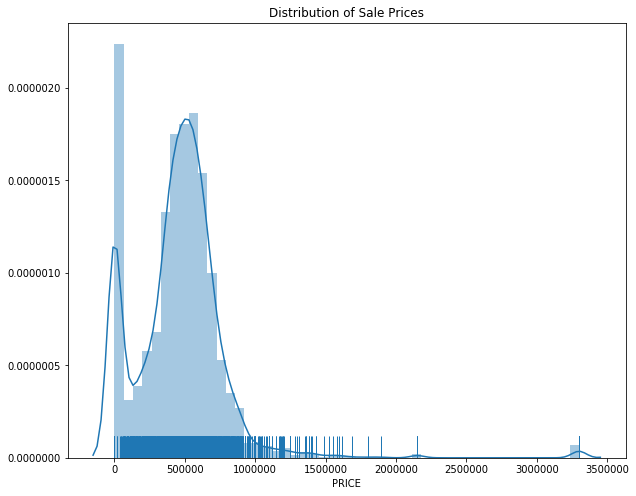

In [51]:
fig, ax = plt.subplots(figsize=(10,8))
g = sns.distplot(condo_6.PRICE, rug=True, kde=True, ax=ax)
t = g.set_title("Distribution of Sale Prices")

It would also be interesting to understand the price based on the year the unit was last sold. We have the SALEDATE and can use that to group the sales prices by year in a box plot. We don't have to create a separate column with the year data. As you can see below, we can manipulate the data we want to use as part of creating the plot.

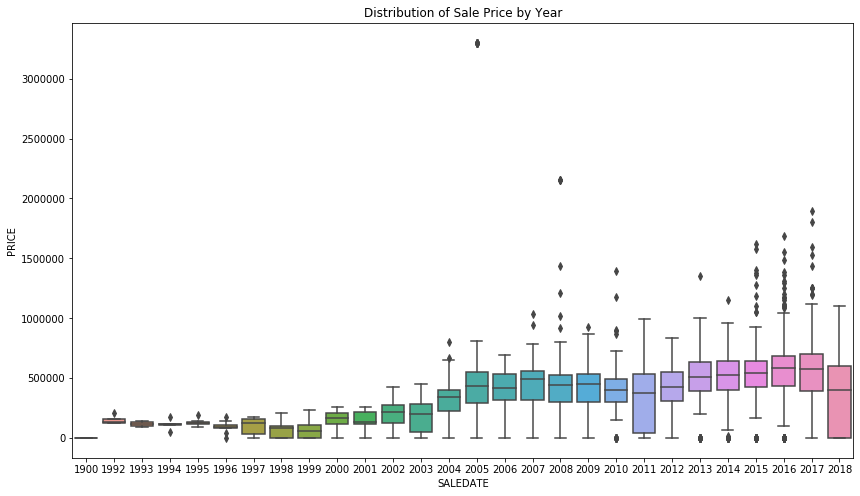

In [52]:
fig, ax = plt.subplots(figsize=(14,8))
g = sns.boxplot(y='PRICE', x=condo_6['SALEDATE'].dt.year, data=condo_6, ax=ax)
t = g.set_title("Distribution of Sale Price by Year")

Seaborn's joint plot allows you to view both a joint distribution and its marginals at once.

C:\Users\falco\anaconda3\lib\site-packages\seaborn\axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


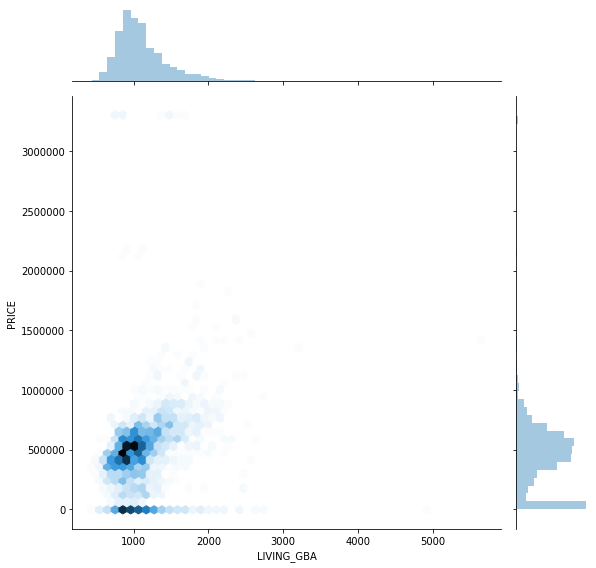

In [53]:
g = sns.jointplot(y="PRICE", x="LIVING_GBA", data=condo_6, kind="hex", size=8)

Since we intend to perform a regression with the data, we can also look at the correlations between our numeric variables in order to identify whether or not we have highly correlated variables. To do that, we will create (yet) another dataframe with the numerical variables. We can create a correlation matrix and provide that to the seaborn heatmap function to create a visual representation of correlation.

In [54]:
numerical = condo_6[list(set(condo_6.columns) - set(['SSL', 'SALEDATE', 'FULLADDRESS', 'UNITNUM']))]
numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2640 entries, 192 to 19562
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SALE_NUM          2640 non-null   int64  
 1   FIREPLACES        2640 non-null   float64
 2   BATHRM            2640 non-null   float64
 3   PRICE             2640 non-null   float64
 4   LIVING_GBA        2640 non-null   int64  
 5   AC                2640 non-null   object 
 6   HF_BATHRM         2640 non-null   float64
 7   MAR_CENSUS_TRACT  2640 non-null   int64  
 8   BEDRM             2640 non-null   float64
 9   AYB               2640 non-null   int64  
 10  EYB               2640 non-null   int64  
 11  ADDRESS_ID        2640 non-null   int64  
 12  BLDG_NUM          2640 non-null   int64  
 13  CMPLX_NUM         2640 non-null   int64  
 14  HEAT              2640 non-null   float64
 15  HEAT_D            2640 non-null   object 
 16  UNIT_ID           2640 non-null   int64

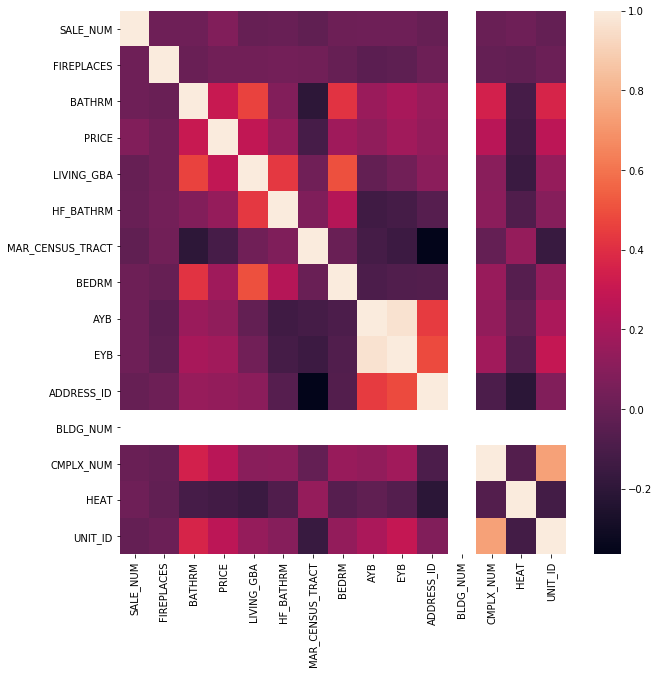

In [56]:
corr_matrix = numerical.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix, ax=ax);

In [58]:
CLIENT_ID = '2G1HLSOXHEVMF0TWLKSBA2L1TKOGILA34RA1Q232ETMF3EJU' #'your-client-ID' # your Foursquare ID
CLIENT_SECRET = 'THFXQ1MGTZ15SCNUL34ZN42WBDYSCHXVOMZ2MQA1COVQNUGU' #'your-client-secret' # your Foursquare Secret
VERSION = '20190325' # Foursquare API version

print('My credentails:')
print('My CLIENT_ID: ' + CLIENT_ID)
print('My CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
My CLIENT_ID: 2G1HLSOXHEVMF0TWLKSBA2L1TKOGILA34RA1Q232ETMF3EJU
My CLIENT_SECRET:THFXQ1MGTZ15SCNUL34ZN42WBDYSCHXVOMZ2MQA1COVQNUGU


In [59]:
radius = 1000
LIMIT = 100

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'Dist_Latitude', 
                  'Dist_Longitude', 
                  'Venue', 
                  'Venue_Lat', 
                  'Venue_Long', 
                  'Venue_Category']
    
    return(nearby_venues)